In [1]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle

This is code to get a trivial model running.

No train/validation split here, using all data to train the model.

Also make a prediction and verify the exact meaning of the loss, and mean absolute error.

In [3]:
# Load simulated data:
np.random.seed(11)

# Training set should be one concatenated shuffled list of simulated examples
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]
y, x = shuffle(
    np.concatenate([np.loadtxt(bounds_file) for bounds_file in bounds_files]),
    np.concatenate([np.loadtxt(intensities_file) for intensities_file in intensities_files])
)

In [4]:
def overlap_metric(y_true, y_predicted):
    y_pred_round = tf.round(y_predicted)
    max_start = tf.math.maximum(y_true[:, 0], y_pred_round[:, 0])
    min_end = tf.math.minimum(y_true[:, 1], y_pred_round[:,1])
    overlap = tf.math.maximum(0.0, min_end - max_start)
    longest_bounds = tf.math.maximum(
        y_true[:, 1] + 1 - y_true[:, 0], 
        y_pred_round[:, 1] + 1 - y_pred_round[:, 0]
        )
    return overlap / longest_bounds

In [5]:
model = tf.keras.Sequential([
        layers.Dense(40, activation='relu'),
        layers.Dense(2, activation='linear')
    ])
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
    loss='mse', 
    metrics=['mae', overlap_metric]
    )

In [6]:
history = model.fit(x, y, epochs=1000, batch_size=8192, validation_split=0.33)

Train on 60299 samples, validate on 29701 samples
Epoch 1/1000
60299/60299 [==============================] - 1s 13us/step - loss: 15743.5779 - mean_absolute_error: 89.0425 - overlap_metric: 0.0096 - val_loss: 2135.7925 - val_mean_absolute_error: 37.2606 - val_overlap_metric: 0.0053
Epoch 2/1000
60299/60299 [==============================] - 0s 1us/step - loss: 1663.6870 - mean_absolute_error: 32.9245 - overlap_metric: 0.0489 - val_loss: 2048.5318 - val_mean_absolute_error: 39.3865 - val_overlap_metric: 0.0608
Epoch 3/1000
60299/60299 [==============================] - 0s 1us/step - loss: 906.0857 - mean_absolute_error: 23.6261 - overlap_metric: 0.0794 - val_loss: 452.0789 - val_mean_absolute_error: 17.0395 - val_overlap_metric: 0.0119
Epoch 4/1000
60299/60299 [==============================] - 0s 1us/step - loss: 584.3852 - mean_absolute_error: 19.3089 - overlap_metric: 0.0060 - val_loss: 274.7168 - val_mean_absolute_error: 12.8870 - val_overlap_metric: 0.0300
Epoch 5/1000
60299/60299

Epoch 37/1000
60299/60299 [==============================] - 0s 1us/step - loss: 21.4482 - mean_absolute_error: 3.5638 - overlap_metric: 0.2921 - val_loss: 20.9690 - val_mean_absolute_error: 3.5271 - val_overlap_metric: 0.2941
Epoch 38/1000
60299/60299 [==============================] - 0s 1us/step - loss: 20.8023 - mean_absolute_error: 3.5106 - overlap_metric: 0.2970 - val_loss: 20.3602 - val_mean_absolute_error: 3.4768 - val_overlap_metric: 0.2991
Epoch 39/1000
60299/60299 [==============================] - 0s 1us/step - loss: 20.1973 - mean_absolute_error: 3.4598 - overlap_metric: 0.3007 - val_loss: 19.7921 - val_mean_absolute_error: 3.4281 - val_overlap_metric: 0.3030
Epoch 40/1000
60299/60299 [==============================] - 0s 1us/step - loss: 19.6339 - mean_absolute_error: 3.4109 - overlap_metric: 0.3035 - val_loss: 19.2584 - val_mean_absolute_error: 3.3820 - val_overlap_metric: 0.3075
Epoch 41/1000
60299/60299 [==============================] - 0s 1us/step - loss: 19.1039 - m

60299/60299 [==============================] - 0s 1us/step - loss: 11.2435 - mean_absolute_error: 2.5817 - overlap_metric: 0.3947 - val_loss: 11.1297 - val_mean_absolute_error: 2.5732 - val_overlap_metric: 0.3970
Epoch 74/1000
60299/60299 [==============================] - 0s 1us/step - loss: 11.1369 - mean_absolute_error: 2.5697 - overlap_metric: 0.3981 - val_loss: 11.0293 - val_mean_absolute_error: 2.5610 - val_overlap_metric: 0.3975
Epoch 75/1000
60299/60299 [==============================] - 0s 1us/step - loss: 11.0353 - mean_absolute_error: 2.5574 - overlap_metric: 0.3969 - val_loss: 10.9297 - val_mean_absolute_error: 2.5502 - val_overlap_metric: 0.4035
Epoch 76/1000
60299/60299 [==============================] - 0s 1us/step - loss: 10.9354 - mean_absolute_error: 2.5460 - overlap_metric: 0.4007 - val_loss: 10.8311 - val_mean_absolute_error: 2.5379 - val_overlap_metric: 0.4026
Epoch 77/1000
60299/60299 [==============================] - 0s 1us/step - loss: 10.8394 - mean_absolute_e

60299/60299 [==============================] - 0s 1us/step - loss: 8.8697 - mean_absolute_error: 2.2873 - overlap_metric: 0.4387 - val_loss: 8.7842 - val_mean_absolute_error: 2.2798 - val_overlap_metric: 0.4398
Epoch 110/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.8336 - mean_absolute_error: 2.2826 - overlap_metric: 0.4399 - val_loss: 8.7422 - val_mean_absolute_error: 2.2742 - val_overlap_metric: 0.4411
Epoch 111/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.7904 - mean_absolute_error: 2.2767 - overlap_metric: 0.4412 - val_loss: 8.7057 - val_mean_absolute_error: 2.2695 - val_overlap_metric: 0.4428
Epoch 112/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.7546 - mean_absolute_error: 2.2718 - overlap_metric: 0.4416 - val_loss: 8.6714 - val_mean_absolute_error: 2.2653 - val_overlap_metric: 0.4452
Epoch 113/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.7172 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 7.8196 - mean_absolute_error: 2.1439 - overlap_metric: 0.4625 - val_loss: 7.7517 - val_mean_absolute_error: 2.1370 - val_overlap_metric: 0.4632
Epoch 146/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.7971 - mean_absolute_error: 2.1411 - overlap_metric: 0.4632 - val_loss: 7.7323 - val_mean_absolute_error: 2.1337 - val_overlap_metric: 0.4615
Epoch 147/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.7742 - mean_absolute_error: 2.1374 - overlap_metric: 0.4629 - val_loss: 7.7157 - val_mean_absolute_error: 2.1321 - val_overlap_metric: 0.4666
Epoch 148/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.7618 - mean_absolute_error: 2.1361 - overlap_metric: 0.4635 - val_loss: 7.6888 - val_mean_absolute_error: 2.1287 - val_overlap_metric: 0.4676
Epoch 149/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.7453 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 7.0739 - mean_absolute_error: 2.0398 - overlap_metric: 0.4784 - val_loss: 7.0102 - val_mean_absolute_error: 2.0334 - val_overlap_metric: 0.4789
Epoch 182/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.0499 - mean_absolute_error: 2.0365 - overlap_metric: 0.4792 - val_loss: 6.9895 - val_mean_absolute_error: 2.0303 - val_overlap_metric: 0.4782
Epoch 183/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.0280 - mean_absolute_error: 2.0334 - overlap_metric: 0.4793 - val_loss: 6.9721 - val_mean_absolute_error: 2.0278 - val_overlap_metric: 0.4786
Epoch 184/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.0130 - mean_absolute_error: 2.0320 - overlap_metric: 0.4791 - val_loss: 6.9514 - val_mean_absolute_error: 2.0252 - val_overlap_metric: 0.4798
Epoch 185/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.9861 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 6.2367 - mean_absolute_error: 1.9220 - overlap_metric: 0.4943 - val_loss: 6.1887 - val_mean_absolute_error: 1.9156 - val_overlap_metric: 0.5000
Epoch 218/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.2169 - mean_absolute_error: 1.9190 - overlap_metric: 0.4962 - val_loss: 6.1899 - val_mean_absolute_error: 1.9149 - val_overlap_metric: 0.4951
Epoch 219/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.1985 - mean_absolute_error: 1.9168 - overlap_metric: 0.4963 - val_loss: 6.1646 - val_mean_absolute_error: 1.9127 - val_overlap_metric: 0.5016
Epoch 220/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.1753 - mean_absolute_error: 1.9127 - overlap_metric: 0.4970 - val_loss: 6.1740 - val_mean_absolute_error: 1.9125 - val_overlap_metric: 0.4962
Epoch 221/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.1709 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.7599 - mean_absolute_error: 1.8470 - overlap_metric: 0.5074 - val_loss: 5.7361 - val_mean_absolute_error: 1.8434 - val_overlap_metric: 0.5051
Epoch 254/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7445 - mean_absolute_error: 1.8444 - overlap_metric: 0.5073 - val_loss: 5.7249 - val_mean_absolute_error: 1.8414 - val_overlap_metric: 0.5053
Epoch 255/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7355 - mean_absolute_error: 1.8426 - overlap_metric: 0.5071 - val_loss: 5.7234 - val_mean_absolute_error: 1.8424 - val_overlap_metric: 0.5102
Epoch 256/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7326 - mean_absolute_error: 1.8423 - overlap_metric: 0.5077 - val_loss: 5.7009 - val_mean_absolute_error: 1.8383 - val_overlap_metric: 0.5089
Epoch 257/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7214 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.4529 - mean_absolute_error: 1.7943 - overlap_metric: 0.5155 - val_loss: 5.4437 - val_mean_absolute_error: 1.7950 - val_overlap_metric: 0.5177
Epoch 290/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4533 - mean_absolute_error: 1.7940 - overlap_metric: 0.5151 - val_loss: 5.4209 - val_mean_absolute_error: 1.7892 - val_overlap_metric: 0.5164
Epoch 291/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4382 - mean_absolute_error: 1.7913 - overlap_metric: 0.5157 - val_loss: 5.4297 - val_mean_absolute_error: 1.7894 - val_overlap_metric: 0.5157
Epoch 292/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4333 - mean_absolute_error: 1.7903 - overlap_metric: 0.5159 - val_loss: 5.4192 - val_mean_absolute_error: 1.7874 - val_overlap_metric: 0.5151
Epoch 293/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4321 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.2154 - mean_absolute_error: 1.7516 - overlap_metric: 0.5220 - val_loss: 5.1924 - val_mean_absolute_error: 1.7482 - val_overlap_metric: 0.5245
Epoch 326/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2103 - mean_absolute_error: 1.7507 - overlap_metric: 0.5225 - val_loss: 5.2066 - val_mean_absolute_error: 1.7481 - val_overlap_metric: 0.5222
Epoch 327/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2123 - mean_absolute_error: 1.7507 - overlap_metric: 0.5223 - val_loss: 5.1807 - val_mean_absolute_error: 1.7456 - val_overlap_metric: 0.5246
Epoch 328/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1990 - mean_absolute_error: 1.7484 - overlap_metric: 0.5226 - val_loss: 5.1775 - val_mean_absolute_error: 1.7452 - val_overlap_metric: 0.5236
Epoch 329/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1908 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.0208 - mean_absolute_error: 1.7157 - overlap_metric: 0.5277 - val_loss: 4.9976 - val_mean_absolute_error: 1.7110 - val_overlap_metric: 0.5280
Epoch 362/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0064 - mean_absolute_error: 1.7126 - overlap_metric: 0.5284 - val_loss: 5.0193 - val_mean_absolute_error: 1.7126 - val_overlap_metric: 0.5242
Epoch 363/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0208 - mean_absolute_error: 1.7155 - overlap_metric: 0.5276 - val_loss: 5.0054 - val_mean_absolute_error: 1.7154 - val_overlap_metric: 0.5315
Epoch 364/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0100 - mean_absolute_error: 1.7138 - overlap_metric: 0.5283 - val_loss: 4.9922 - val_mean_absolute_error: 1.7088 - val_overlap_metric: 0.5281
Epoch 365/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9990 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.8925 - mean_absolute_error: 1.6913 - overlap_metric: 0.5315 - val_loss: 4.8719 - val_mean_absolute_error: 1.6922 - val_overlap_metric: 0.5371
Epoch 398/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8480 - mean_absolute_error: 1.6833 - overlap_metric: 0.5335 - val_loss: 4.8449 - val_mean_absolute_error: 1.6802 - val_overlap_metric: 0.5318
Epoch 399/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8348 - mean_absolute_error: 1.6806 - overlap_metric: 0.5333 - val_loss: 4.8554 - val_mean_absolute_error: 1.6813 - val_overlap_metric: 0.5264
Epoch 400/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8363 - mean_absolute_error: 1.6810 - overlap_metric: 0.5317 - val_loss: 4.8158 - val_mean_absolute_error: 1.6793 - val_overlap_metric: 0.5376
Epoch 401/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8487 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.6764 - mean_absolute_error: 1.6510 - overlap_metric: 0.5373 - val_loss: 4.6781 - val_mean_absolute_error: 1.6498 - val_overlap_metric: 0.5381
Epoch 434/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6741 - mean_absolute_error: 1.6507 - overlap_metric: 0.5384 - val_loss: 4.6833 - val_mean_absolute_error: 1.6498 - val_overlap_metric: 0.5336
Epoch 435/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7210 - mean_absolute_error: 1.6594 - overlap_metric: 0.5362 - val_loss: 4.6564 - val_mean_absolute_error: 1.6488 - val_overlap_metric: 0.5408
Epoch 436/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7001 - mean_absolute_error: 1.6562 - overlap_metric: 0.5369 - val_loss: 4.6521 - val_mean_absolute_error: 1.6471 - val_overlap_metric: 0.5406
Epoch 437/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6618 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.5654 - mean_absolute_error: 1.6304 - overlap_metric: 0.5409 - val_loss: 4.5099 - val_mean_absolute_error: 1.6209 - val_overlap_metric: 0.5432
Epoch 470/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5578 - mean_absolute_error: 1.6286 - overlap_metric: 0.5411 - val_loss: 4.5614 - val_mean_absolute_error: 1.6260 - val_overlap_metric: 0.5380
Epoch 471/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6168 - mean_absolute_error: 1.6394 - overlap_metric: 0.5388 - val_loss: 4.5558 - val_mean_absolute_error: 1.6251 - val_overlap_metric: 0.5385
Epoch 472/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7706 - mean_absolute_error: 1.6698 - overlap_metric: 0.5343 - val_loss: 4.5679 - val_mean_absolute_error: 1.6374 - val_overlap_metric: 0.5459
Epoch 473/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5218 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.4295 - mean_absolute_error: 1.6063 - overlap_metric: 0.5448 - val_loss: 4.4123 - val_mean_absolute_error: 1.6018 - val_overlap_metric: 0.5459
Epoch 506/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4149 - mean_absolute_error: 1.6040 - overlap_metric: 0.5453 - val_loss: 4.7564 - val_mean_absolute_error: 1.6817 - val_overlap_metric: 0.5458
Epoch 507/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8376 - mean_absolute_error: 1.6873 - overlap_metric: 0.5338 - val_loss: 4.2969 - val_mean_absolute_error: 1.5798 - val_overlap_metric: 0.5462
Epoch 508/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4442 - mean_absolute_error: 1.6089 - overlap_metric: 0.5444 - val_loss: 4.3091 - val_mean_absolute_error: 1.5858 - val_overlap_metric: 0.5498
Epoch 509/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4807 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.1346 - mean_absolute_error: 1.5478 - overlap_metric: 0.5533 - val_loss: 4.0896 - val_mean_absolute_error: 1.5372 - val_overlap_metric: 0.5553
Epoch 542/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2752 - mean_absolute_error: 1.7749 - overlap_metric: 0.5192 - val_loss: 9.9512 - val_mean_absolute_error: 2.6356 - val_overlap_metric: 0.3558
Epoch 543/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.3632 - mean_absolute_error: 2.3449 - overlap_metric: 0.4343 - val_loss: 4.0952 - val_mean_absolute_error: 1.5375 - val_overlap_metric: 0.5529
Epoch 544/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.5644 - mean_absolute_error: 1.8398 - overlap_metric: 0.5103 - val_loss: 4.0873 - val_mean_absolute_error: 1.5404 - val_overlap_metric: 0.5576
Epoch 545/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6063 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.9373 - mean_absolute_error: 1.5081 - overlap_metric: 0.5598 - val_loss: 3.9380 - val_mean_absolute_error: 1.5080 - val_overlap_metric: 0.5589
Epoch 578/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0461 - mean_absolute_error: 1.5338 - overlap_metric: 0.5557 - val_loss: 4.3266 - val_mean_absolute_error: 1.6042 - val_overlap_metric: 0.5506
Epoch 579/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8481 - mean_absolute_error: 1.7084 - overlap_metric: 0.5307 - val_loss: 5.1756 - val_mean_absolute_error: 1.7862 - val_overlap_metric: 0.5271
Epoch 580/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9968 - mean_absolute_error: 1.7405 - overlap_metric: 0.5258 - val_loss: 4.0196 - val_mean_absolute_error: 1.5339 - val_overlap_metric: 0.5606
Epoch 581/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5453 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 6.8473 - mean_absolute_error: 2.0932 - overlap_metric: 0.4743 - val_loss: 3.8532 - val_mean_absolute_error: 1.4974 - val_overlap_metric: 0.5616
Epoch 614/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0078 - mean_absolute_error: 1.5298 - overlap_metric: 0.5565 - val_loss: 3.8314 - val_mean_absolute_error: 1.4861 - val_overlap_metric: 0.5626
Epoch 615/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0809 - mean_absolute_error: 1.5465 - overlap_metric: 0.5543 - val_loss: 3.9141 - val_mean_absolute_error: 1.5145 - val_overlap_metric: 0.5602
Epoch 616/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0546 - mean_absolute_error: 1.5403 - overlap_metric: 0.5549 - val_loss: 4.6144 - val_mean_absolute_error: 1.6622 - val_overlap_metric: 0.5349
Epoch 617/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1042 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.1254 - mean_absolute_error: 1.5629 - overlap_metric: 0.5515 - val_loss: 3.6931 - val_mean_absolute_error: 1.4606 - val_overlap_metric: 0.5687
Epoch 650/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8883 - mean_absolute_error: 1.5056 - overlap_metric: 0.5601 - val_loss: 3.6945 - val_mean_absolute_error: 1.4644 - val_overlap_metric: 0.5670
Epoch 651/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1414 - mean_absolute_error: 1.5650 - overlap_metric: 0.5510 - val_loss: 3.8542 - val_mean_absolute_error: 1.4935 - val_overlap_metric: 0.5627
Epoch 652/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8753 - mean_absolute_error: 1.5035 - overlap_metric: 0.5604 - val_loss: 4.0648 - val_mean_absolute_error: 1.5554 - val_overlap_metric: 0.5591
Epoch 653/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9757 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.7854 - mean_absolute_error: 1.9269 - overlap_metric: 0.4988 - val_loss: 3.8075 - val_mean_absolute_error: 1.5033 - val_overlap_metric: 0.5590
Epoch 686/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1969 - mean_absolute_error: 1.5839 - overlap_metric: 0.5480 - val_loss: 4.7457 - val_mean_absolute_error: 1.7048 - val_overlap_metric: 0.5314
Epoch 687/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9688 - mean_absolute_error: 1.5295 - overlap_metric: 0.5562 - val_loss: 4.4693 - val_mean_absolute_error: 1.6559 - val_overlap_metric: 0.5405
Epoch 688/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6608 - mean_absolute_error: 1.6903 - overlap_metric: 0.5324 - val_loss: 3.5444 - val_mean_absolute_error: 1.4319 - val_overlap_metric: 0.5759
Epoch 689/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2749 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.7454 - mean_absolute_error: 1.4826 - overlap_metric: 0.5632 - val_loss: 3.5982 - val_mean_absolute_error: 1.4423 - val_overlap_metric: 0.5677
Epoch 722/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5184 - mean_absolute_error: 1.4278 - overlap_metric: 0.5716 - val_loss: 3.5742 - val_mean_absolute_error: 1.4499 - val_overlap_metric: 0.5664
Epoch 723/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8036 - mean_absolute_error: 1.4989 - overlap_metric: 0.5606 - val_loss: 3.4580 - val_mean_absolute_error: 1.4164 - val_overlap_metric: 0.5689
Epoch 724/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5367 - mean_absolute_error: 1.4343 - overlap_metric: 0.5699 - val_loss: 3.8729 - val_mean_absolute_error: 1.5058 - val_overlap_metric: 0.5563
Epoch 725/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3310 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.1010 - mean_absolute_error: 1.5702 - overlap_metric: 0.5504 - val_loss: 3.3866 - val_mean_absolute_error: 1.4014 - val_overlap_metric: 0.5723
Epoch 758/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4461 - mean_absolute_error: 1.4136 - overlap_metric: 0.5732 - val_loss: 3.3657 - val_mean_absolute_error: 1.3950 - val_overlap_metric: 0.5752
Epoch 759/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4191 - mean_absolute_error: 1.4074 - overlap_metric: 0.5743 - val_loss: 3.4646 - val_mean_absolute_error: 1.4134 - val_overlap_metric: 0.5718
Epoch 760/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7972 - mean_absolute_error: 1.4991 - overlap_metric: 0.5608 - val_loss: 5.0818 - val_mean_absolute_error: 1.8047 - val_overlap_metric: 0.5093
Epoch 761/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2507 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.2823 - mean_absolute_error: 1.3760 - overlap_metric: 0.5786 - val_loss: 3.3857 - val_mean_absolute_error: 1.3989 - val_overlap_metric: 0.5784
Epoch 794/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4181 - mean_absolute_error: 1.4109 - overlap_metric: 0.5736 - val_loss: 3.4705 - val_mean_absolute_error: 1.4290 - val_overlap_metric: 0.5728
Epoch 795/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6030 - mean_absolute_error: 1.4586 - overlap_metric: 0.5668 - val_loss: 3.2909 - val_mean_absolute_error: 1.3772 - val_overlap_metric: 0.5768
Epoch 796/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3621 - mean_absolute_error: 1.3948 - overlap_metric: 0.5757 - val_loss: 3.6910 - val_mean_absolute_error: 1.4705 - val_overlap_metric: 0.5626
Epoch 797/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7568 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.3925 - mean_absolute_error: 1.4064 - overlap_metric: 0.5742 - val_loss: 3.2002 - val_mean_absolute_error: 1.3574 - val_overlap_metric: 0.5812
Epoch 830/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1995 - mean_absolute_error: 1.3564 - overlap_metric: 0.5819 - val_loss: 3.2074 - val_mean_absolute_error: 1.3591 - val_overlap_metric: 0.5775
Epoch 831/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2725 - mean_absolute_error: 1.6153 - overlap_metric: 0.5435 - val_loss: 8.3370 - val_mean_absolute_error: 2.4662 - val_overlap_metric: 0.4193
Epoch 832/1000
60299/60299 [==============================] - 0s 1us/step - loss: 8.2495 - mean_absolute_error: 2.3952 - overlap_metric: 0.4333 - val_loss: 4.2636 - val_mean_absolute_error: 1.6183 - val_overlap_metric: 0.5485
Epoch 833/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5573 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.2042 - mean_absolute_error: 1.3599 - overlap_metric: 0.5812 - val_loss: 3.7538 - val_mean_absolute_error: 1.4924 - val_overlap_metric: 0.5640
Epoch 866/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4565 - mean_absolute_error: 1.6725 - overlap_metric: 0.5351 - val_loss: 4.2774 - val_mean_absolute_error: 1.6187 - val_overlap_metric: 0.5434
Epoch 867/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5785 - mean_absolute_error: 1.4526 - overlap_metric: 0.5674 - val_loss: 3.2445 - val_mean_absolute_error: 1.3745 - val_overlap_metric: 0.5818
Epoch 868/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2522 - mean_absolute_error: 1.3724 - overlap_metric: 0.5794 - val_loss: 3.5131 - val_mean_absolute_error: 1.4480 - val_overlap_metric: 0.5610
Epoch 869/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9158 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.0994 - mean_absolute_error: 1.3348 - overlap_metric: 0.5853 - val_loss: 3.0759 - val_mean_absolute_error: 1.3305 - val_overlap_metric: 0.5806
Epoch 902/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1377 - mean_absolute_error: 1.3429 - overlap_metric: 0.5831 - val_loss: 3.2262 - val_mean_absolute_error: 1.3653 - val_overlap_metric: 0.5852
Epoch 903/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3113 - mean_absolute_error: 1.3899 - overlap_metric: 0.5774 - val_loss: 3.0996 - val_mean_absolute_error: 1.3382 - val_overlap_metric: 0.5877
Epoch 904/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0626 - mean_absolute_error: 1.3248 - overlap_metric: 0.5868 - val_loss: 3.1035 - val_mean_absolute_error: 1.3398 - val_overlap_metric: 0.5813
Epoch 905/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1749 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.1129 - mean_absolute_error: 1.3393 - overlap_metric: 0.5832 - val_loss: 3.4958 - val_mean_absolute_error: 1.4438 - val_overlap_metric: 0.5763
Epoch 938/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2171 - mean_absolute_error: 1.3707 - overlap_metric: 0.5798 - val_loss: 3.4846 - val_mean_absolute_error: 1.4298 - val_overlap_metric: 0.5677
Epoch 939/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2855 - mean_absolute_error: 1.3871 - overlap_metric: 0.5769 - val_loss: 2.9966 - val_mean_absolute_error: 1.3114 - val_overlap_metric: 0.5860
Epoch 940/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7126 - mean_absolute_error: 1.4905 - overlap_metric: 0.5618 - val_loss: 5.2199 - val_mean_absolute_error: 1.8481 - val_overlap_metric: 0.5133
Epoch 941/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0024 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.3534 - mean_absolute_error: 1.4066 - overlap_metric: 0.5736 - val_loss: 2.9500 - val_mean_absolute_error: 1.2983 - val_overlap_metric: 0.5939
Epoch 974/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5432 - mean_absolute_error: 1.4558 - overlap_metric: 0.5671 - val_loss: 3.0445 - val_mean_absolute_error: 1.3183 - val_overlap_metric: 0.5874
Epoch 975/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2630 - mean_absolute_error: 1.3802 - overlap_metric: 0.5781 - val_loss: 3.1392 - val_mean_absolute_error: 1.3552 - val_overlap_metric: 0.5841
Epoch 976/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3851 - mean_absolute_error: 1.4123 - overlap_metric: 0.5732 - val_loss: 3.5394 - val_mean_absolute_error: 1.4535 - val_overlap_metric: 0.5740
Epoch 977/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1476 - mean_absolute_error:

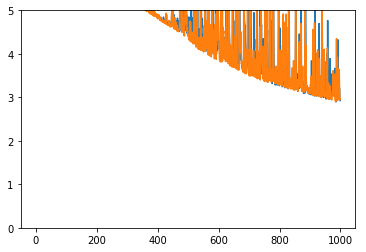

In [7]:
plt.ylim(0, 5)
plt.plot(range(len(history.history['loss'])), history.history['loss'], history.history['val_loss'])

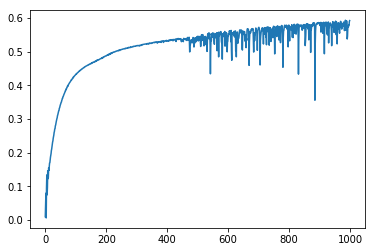

In [8]:
plt.plot(range(len(history.history['overlap_metric'])),history.history['overlap_metric'])

In [9]:
print(history.history.keys()) 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_overlap_metric', 'loss', 'mean_absolute_error', 'overlap_metric'])


## Final accuracy

In [10]:
print("Mean absolute error", history.history['val_mean_absolute_error'][-1])
print("Overlap metric", history.history['val_overlap_metric'][-1])

Mean absolute error 1.294833166664054
Overlap metric 0.5905346507990161
